In [1]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline

In [4]:
model1 = tf.keras.models.load_model('tfsincmodel')

In [5]:
testx = np.linspace(-10, 10, 165)
testy = model1.predict(testx)

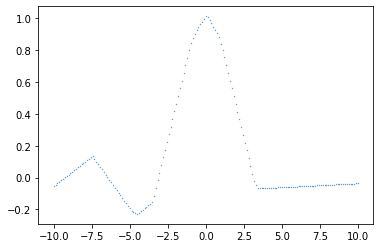

In [6]:
plt.scatter(testx, testy, s=0.1)

# Without Quantization

In [7]:
converter = tf.lite.TFLiteConverter.from_keras_model(model1)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /var/folders/rg/x22ydmg16jx944ktmgv7r1d80000gn/T/tmpi2a5rp6b/assets


In [8]:
open('sinc_model.tflite', 'wb').write(tflite_model)

1372

# With Quantization

In [17]:
converter1 = tf.lite.TFLiteConverter.from_keras_model(model1)
converter1.optimizations = [tf.lite.Optimize.DEFAULT]

In [18]:
def representative_dataset_generator():
    for value in testx:
        yield [np.array(value, dtype=np.float32, ndmin=2)]

In [19]:
converter1.representative_dataset = representative_dataset_generator

In [20]:
quantized_tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /var/folders/rg/x22ydmg16jx944ktmgv7r1d80000gn/T/tmpr8wlpwre/assets
INFO:tensorflow:Assets written to: /var/folders/rg/x22ydmg16jx944ktmgv7r1d80000gn/T/tmpr8wlpwre/assets


In [21]:
open('quantized_sinc_model.tflite', 'wb').write(quantized_tflite_model)

1372